# EDA in Loan Approval data

### Set up libraries and load the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\FWX PC\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/siwatis/Credit-Analysis-Prediction/main/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### Data Cleaning and Validation (First screening)

In [22]:
# Columns name: replace widespaces
df.columns = [col.replace(' ','') for col in df.columns]

# Drop loan_id column
df.set_index('loan_id', inplace=True)

# Set data type to each variables and clean space for categorical variable
categorical_col = ['no_of_dependents','education','self_employed','loan_term','loan_status']
measure_col = ['income_annum','loan_amount','cibil_score','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']
for col in categorical_col:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].astype('category')
for col in measure_col:
    df[col] = df[col].astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   no_of_dependents          4269 non-null   category
 1   education                 4269 non-null   category
 2   self_employed             4269 non-null   category
 3   income_annum              4269 non-null   float64 
 4   loan_amount               4269 non-null   float64 
 5   loan_term                 4269 non-null   category
 6   cibil_score               4269 non-null   float64 
 7   residential_assets_value  4269 non-null   float64 
 8   commercial_assets_value   4269 non-null   float64 
 9   luxury_assets_value       4269 non-null   float64 
 10  bank_asset_value          4269 non-null   float64 
 11  loan_status               4269 non-null   category
dtypes: category(5), float64(7)
memory usage: 255.4 KB


The dataset has no missing value, and completely assign data type to all columns

In [6]:
df.describe().map('{:,.2f}'.format)

,income_annum,loan_amount,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,"4,269.00","4,269.00","4,269.00","4,269.00","4,269.00","4,269.00","4,269.00"
mean,"5,059,123.92","15,133,450.46",599.94,"7,472,616.54","4,973,155.31","15,126,305.93","4,976,692.43"
std,"2,806,839.83","9,043,362.98",172.43,"6,503,636.59","4,388,966.09","9,103,753.67","3,250,185.31"
min,"200,000.00","300,000.00",300.00,"-100,000.00",0.00,"300,000.00",0.00
25%,"2,700,000.00","7,700,000.00",453.00,"2,200,000.00","1,300,000.00","7,500,000.00","2,300,000.00"
50%,"5,100,000.00","14,500,000.00",600.00,"5,600,000.00","3,700,000.00","14,600,000.00","4,600,000.00"
75%,"7,500,000.00","21,500,000.00",748.00,"11,300,000.00","7,600,000.00","21,700,000.00","7,100,000.00"
max,"9,900,000.00","39,500,000.00",900.00,"29,100,000.00","19,400,000.00","39,200,000.00","14,700,000.00"


In [20]:
df[measure_col][df[measure_col].apply(lambda x: x >= 0)].describe().map('{:,.2f}'.format)

,income_annum,loan_amount,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,"4,269.00","4,269.00","4,269.00","4,241.00","4,269.00","4,269.00","4,269.00"
mean,"5,059,123.92","15,133,450.46",599.94,"7,522,612.59","4,973,155.31","15,126,305.93","4,976,692.43"
std,"2,806,839.83","9,043,362.98",172.43,"6,495,800.19","4,388,966.09","9,103,753.67","3,250,185.31"
min,"200,000.00","300,000.00",300.00,0.00,0.00,"300,000.00",0.00
25%,"2,700,000.00","7,700,000.00",453.00,"2,200,000.00","1,300,000.00","7,500,000.00","2,300,000.00"
50%,"5,100,000.00","14,500,000.00",600.00,"5,700,000.00","3,700,000.00","14,600,000.00","4,600,000.00"
75%,"7,500,000.00","21,500,000.00",748.00,"11,400,000.00","7,600,000.00","21,700,000.00","7,100,000.00"
max,"9,900,000.00","39,500,000.00",900.00,"29,100,000.00","19,400,000.00","39,200,000.00","14,700,000.00"


In [78]:
df = [df[measure_col].apply(lambda x: x >= 0)].index

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,NaN,NaN,NaN,9600000.0,29900000.0,NaN,778.0,2400000.0,17600000.0,22700000.0,8000000.0,NaN
2,NaN,NaN,NaN,4100000.0,12200000.0,NaN,417.0,2700000.0,2200000.0,8800000.0,3300000.0,NaN
3,NaN,NaN,NaN,9100000.0,29700000.0,NaN,506.0,7100000.0,4500000.0,33300000.0,12800000.0,NaN
4,NaN,NaN,NaN,8200000.0,30700000.0,NaN,467.0,18200000.0,3300000.0,23300000.0,7900000.0,NaN
5,NaN,NaN,NaN,9800000.0,24200000.0,NaN,382.0,12400000.0,8200000.0,29400000.0,5000000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4265,NaN,NaN,NaN,1000000.0,2300000.0,NaN,317.0,2800000.0,500000.0,3300000.0,800000.0,NaN
4266,NaN,NaN,NaN,3300000.0,11300000.0,NaN,559.0,4200000.0,2900000.0,11000000.0,1900000.0,NaN
4267,NaN,NaN,NaN,6500000.0,23900000.0,NaN,457.0,1200000.0,12400000.0,18100000.0,7300000.0,NaN


In [82]:
df[df['residential_assets_value'] < 0]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
60,4,Not Graduate,Yes,5500000.0,18200000.0,16,797.0,-100000.0,4900000.0,18600000.0,4800000.0,Approved
197,4,Not Graduate,Yes,400000.0,1500000.0,2,669.0,-100000.0,600000.0,900000.0,500000.0,Approved
560,2,Graduate,Yes,200000.0,500000.0,6,885.0,-100000.0,0.0,300000.0,200000.0,Rejected
703,4,Graduate,Yes,6300000.0,23900000.0,6,899.0,-100000.0,11400000.0,20600000.0,6700000.0,Approved
738,2,Graduate,Yes,900000.0,2500000.0,16,458.0,-100000.0,100000.0,3200000.0,1100000.0,Rejected
785,0,Graduate,No,5000000.0,14400000.0,2,761.0,-100000.0,7300000.0,12600000.0,4500000.0,Approved
905,2,Graduate,No,4100000.0,14900000.0,12,571.0,-100000.0,5200000.0,13000000.0,3400000.0,Approved
1090,3,Graduate,No,5100000.0,11000000.0,6,336.0,-100000.0,5800000.0,11600000.0,7500000.0,Rejected
1164,2,Graduate,No,4500000.0,9100000.0,18,593.0,-100000.0,600000.0,12400000.0,2500000.0,Approved


In [80]:
df[measure_col].apply(lambda x: x >= 0).index

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       4260, 4261, 4262, 4263, 4264, 4265, 4266, 4267, 4268, 4269],
      dtype='int64', name='loan_id', length=4269)

### Exploratory Data Analysis

In [5]:
df_measure_melt = df[measure_col + ['loan_status']].melt(id_vars='loan_status')

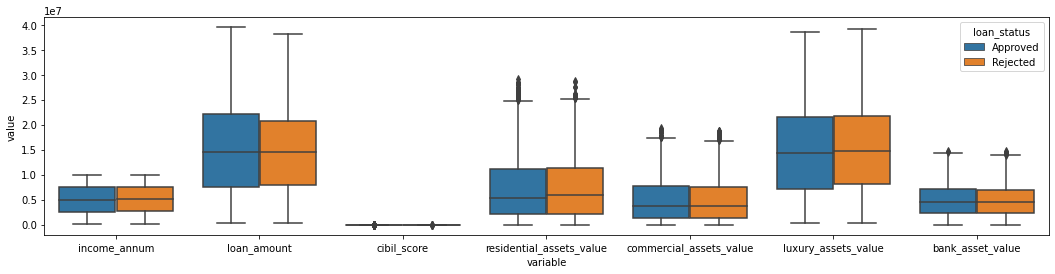

In [6]:
plt.subplots(figsize=[18,4])
sns.boxplot(data=df_measure_melt, x='variable', y='value', hue='loan_status');

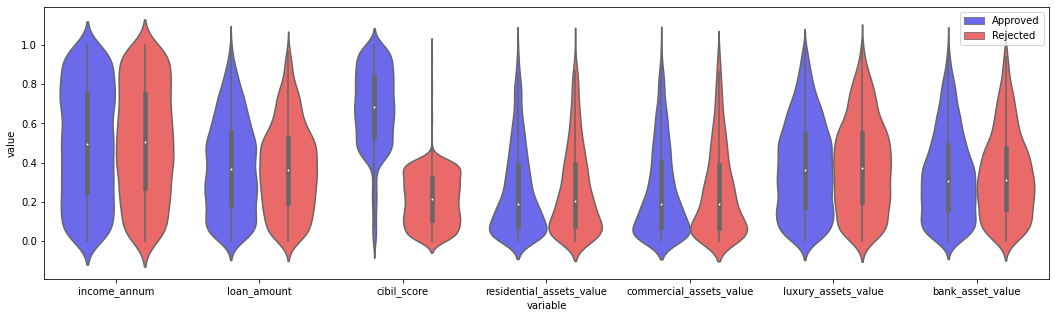

In [27]:
# New visualization with min-max normalized scale

def normalize(data, column_name=measure_col, include_target=True):
    data_ = data[column_name].copy()
    for col in data_.columns:
        data_[col] = (data_[col] - data_[col].min())/(data_[col].max() - data_[col].min())
    if include_target:
        data_['loan_status'] = data['loan_status']
    return data_

df_normalized_melt = normalize(df).melt(id_vars='loan_status')

plt.subplots(figsize=[18,5])
sns.violinplot(data=df_normalized_melt, x='variable', y='value', hue='loan_status', palette='seismic')
plt.legend(loc='upper right')
plt.show()

In [32]:
df_normalized_melt.pivot_table(index='loan_status', columns='variable', values='value', aggfunc='median')

variable,bank_asset_value,cibil_score,commercial_assets_value,income_annum,loan_amount,luxury_assets_value,residential_assets_value
loan_status,,,,,,,
Approved,0.306122,0.685,0.190722,0.494845,0.364796,0.362468,0.188356
Rejected,0.312925,0.215,0.190722,0.505155,0.362245,0.372751,0.205479


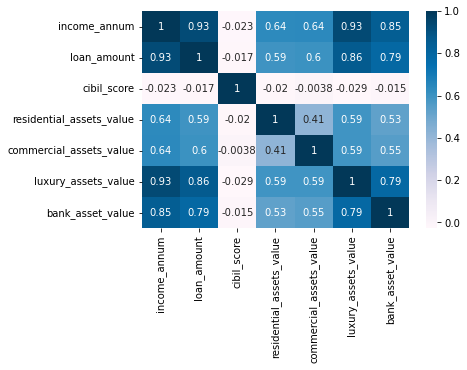

In [85]:
sns.heatmap(df[measure_col].corr(), cmap='PuBu', annot=True);

In [34]:
df_categorical_melt = df[categorical_col].melt(id_vars='loan_status').assign(variable_value = lambda x: x.variable + '_' + x.value)

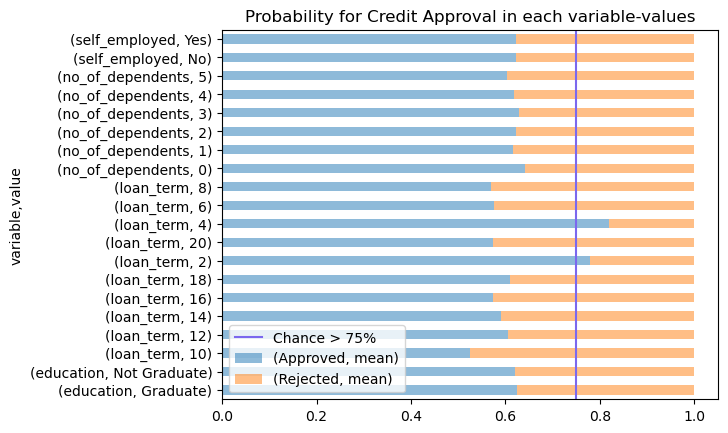

In [77]:
df_categorical_melt \
    .assign(Approved = lambda x: x.loan_status.apply(lambda y: 1 if y == 'Approved' else 0).astype(int)) \
    .assign(Rejected = lambda x: x.loan_status.apply(lambda y: 1 if y == 'Rejected' else 0).astype(int)) \
    .groupby(['variable', 'value'])[['Approved','Rejected']].agg(['mean']) \
    .plot.barh(stacked=True, alpha=0.5)
plt.axvline(0.75, c='mediumslateblue', label='Chance > 75%')
plt.legend(title='', loc='lower left')
plt.title('Probability for Credit Approval in each variable-values')
plt.show()